In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 

In [2]:
API = ApiServer()

In [3]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_10w_14d_8r_3s_10c_synt.json
1.	dc_12w_12c_13d_4s_4r_tiles_rr.json
2.	dc_5d_4c_4s_4r_12w.json
3.	dc_AEC_1d_2c_1s_4r_4w.json
4.	dc_EEG_18d_12c_6s_10r_12w_CE.json
5.	dc_EEG_18d_12c_6s_10r_12w_FL.json
6.	dc_EEG_18d_12c_6s_10r_12w_MSE.json
7.	dc_EEG_18d_9c_3s_5r_9w_RR.json
8.	dc_EEG_1d_1c_3s_2r_3w_RR.json
9.	dc_EEG_1d_2c_1s_4r_2w.json
10.	dc_EEG_1d_2c_1s_4r_4w.json
11.	dc_EEG_3d_1c_1s_1r_1w.json
12.	dc_EEG_4d_3c_3s_2r_3w.json
13.	dc_EEG_8d_1c_3s_2r_3w_RR.json
14.	dc_EEG_8d_3c_3s_2r_3w.json
15.	dc_EEG_8d_3c_3s_2r_3w_RR.json
16.	dc_EEG_8d_3c_3s_2r_3w_demo_RR.json
17.	dc_EEG_8d_3c_3s_5r_3w_RR.json
18.	dc_EEG_8d_8c_3s_5r_8w_RR.json
19.	dc_FedTorchTest_5d_2s_2r_4c_4w.json
20.	dc_dist_14d.json
21.	dc_dist_2d_3c_2s_3r_6w.json
22.	dc_fed_dist_14d.json
23.	dc_fed_dist_2d_3c_2s_3r_6w.json
24.	dc_fed_synt_1d_2c_2r_1s_4w_1ws.json
25.	dc_mnist_13d_12w_4r_3s_3tokens.json
26.	dc_mnist_4w_5d_4r_4s_rr.json
27.	dc_synt_8d_8w_2c_4s_4r.json
28.	dc_sy

In [4]:
dc = 10
conn = 25
exp = 2
API.setJsons(dc , conn , exp)

In [5]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [6]:
exp_name = "EEG_Emotion_1Device_Persons"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-08-15 07:09:10,990] 
Network components:
                 Receiver's Address: http://10.0.0.30:8082
                 Frequency: 5 [batches/sec]
                 Batchsize: 10 [samples]
                 devicesIp: ['10.0.0.30']
                 mainServerIp: 10.0.0.30
                 mainServerPort: 8081
                 apiServerIp: 10.0.0.30
                 apiServerPort: 8082
                 Clients: ['c1', 'c2']
                 Workers: ['w1', 'w2', 'w3', 'w4']
                 Sources: ['s1']
                 Routers: ['r1', 'r2', 'r3', 'r4']
[INFO][2024-08-15 07:09:10,991] Connections:
[INFO][2024-08-15 07:09:10,991] 		 r1 : ['mainServer', 'r2']
[INFO][2024-08-15 07:09:10,992] 		 r2 : ['r3', 's1']
[INFO][2024-08-15 07:09:10,992] 		 r3 : ['r4', 'c1']
[INFO][2024-08-15 07:09:10,993] 		 r4 : ['r1', 'c2']
[INFO][2024-08-15 07:09:10,994] Experiment name: EEG_Valence_Recognition_DEAP
[INFO][2024-08-15 07:09:10,995] Batch size: 10
[INFO][2024-08-15 07:09:10,995] Number of

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-08-15 07:09:13,012] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


In [7]:
API.send_jsons_to_devices()

[INFO][2024-08-15 07:09:13,357] Sending distributed configurations to devices is completed


In [8]:
API.run_current_experiment_phase()

[INFO][2024-08-15 07:09:13,363] Experiment phase: training_phase of type training starts running...
[INFO][2024-08-15 07:09:13,364] Sending data to sources
[INFO][2024-08-15 07:09:13,861] Data is ready in sources
[INFO][2024-08-15 07:09:13,862] Phase training requested from Main Server
[INFO][2024-08-15 07:09:22,354] Processing experiment phase data
[INFO][2024-08-15 07:09:22,355] Processing experiment phase data completed
[INFO][2024-08-15 07:09:22,356] Start generating communication statistics for training_phase of type training
[INFO][2024-08-15 07:09:22,356] Statistics requested from Main Server
[INFO][2024-08-15 07:09:22,810] Statistics received from Main Server
[INFO][2024-08-15 07:09:22,811] Phase of training_phase training completed


In [9]:
stats_train = API.get_experiment_flow(exp_name).generate_stats()

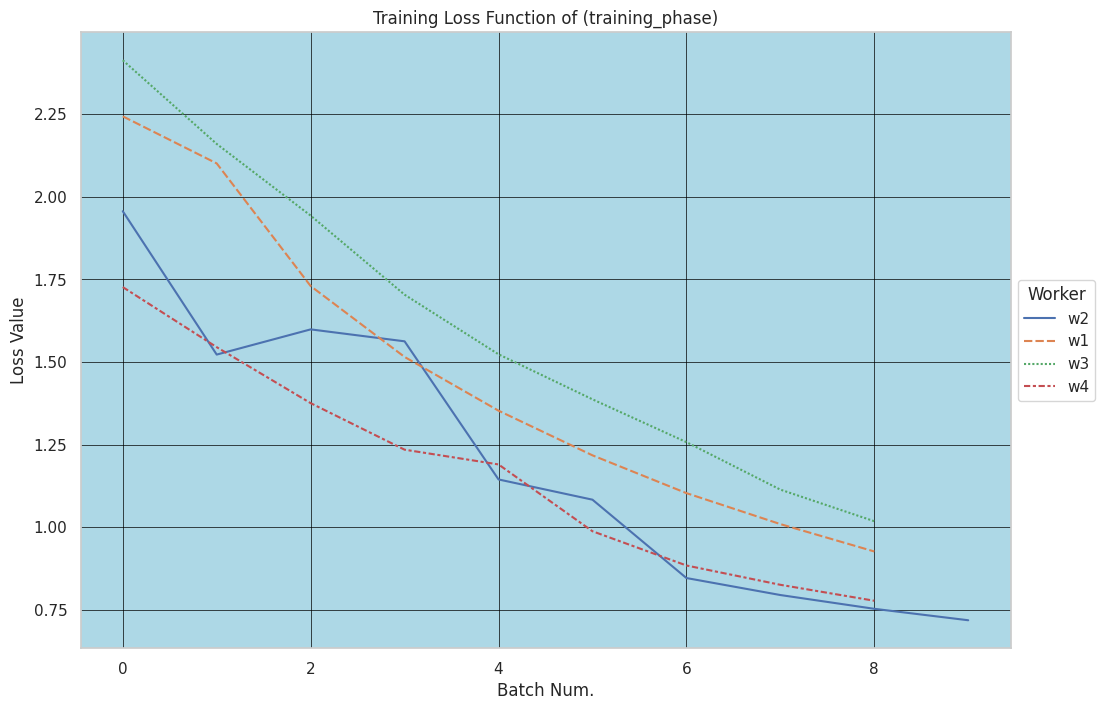

,w2,w1,w3,w4
0,1.956737,2.244027,2.413853,1.727031
1,1.522653,2.101489,2.160423,1.545121
2,1.598969,1.730143,1.943480,1.375619
3,1.562801,1.515471,1.704022,1.234698
4,1.144603,1.352818,1.523476,1.190028
5,1.083306,1.217585,1.387164,0.987729
6,0.846091,1.103204,1.257571,0.884101
7,0.794617,1.009384,1.113770,0.825593
8,0.752889,0.926512,1.018114,0.777290
9,0.718254,NaN,NaN,NaN


In [10]:
stats_train.get_loss_ts(plot=True)

In [11]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-08-15 07:09:23,136] Experiment phase: prediction_phase of type prediction starts running...
[INFO][2024-08-15 07:09:23,137] Sending data to sources
[INFO][2024-08-15 07:09:23,377] Data is ready in sources
[INFO][2024-08-15 07:09:23,379] Phase prediction requested from Main Server
[INFO][2024-08-15 07:09:25,189] Processing experiment phase data
[INFO][2024-08-15 07:09:25,191] Processing experiment phase data completed
[INFO][2024-08-15 07:09:25,191] Start generating communication statistics for prediction_phase of type prediction
[INFO][2024-08-15 07:09:25,192] Statistics requested from Main Server
[INFO][2024-08-15 07:09:25,597] Statistics received from Main Server
[INFO][2024-08-15 07:09:25,598] Phase of prediction_phase prediction completed


In [12]:
stats_pred = API.get_experiment_flow(exp_name).generate_stats()

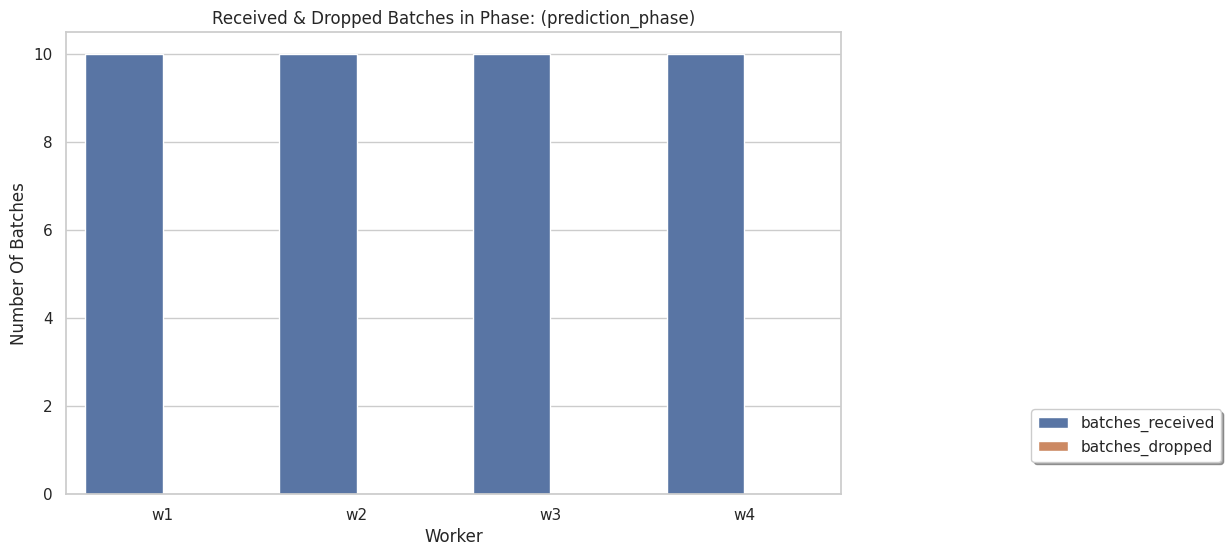

In [13]:
stats_pred.plot_batches_status(plot=True)

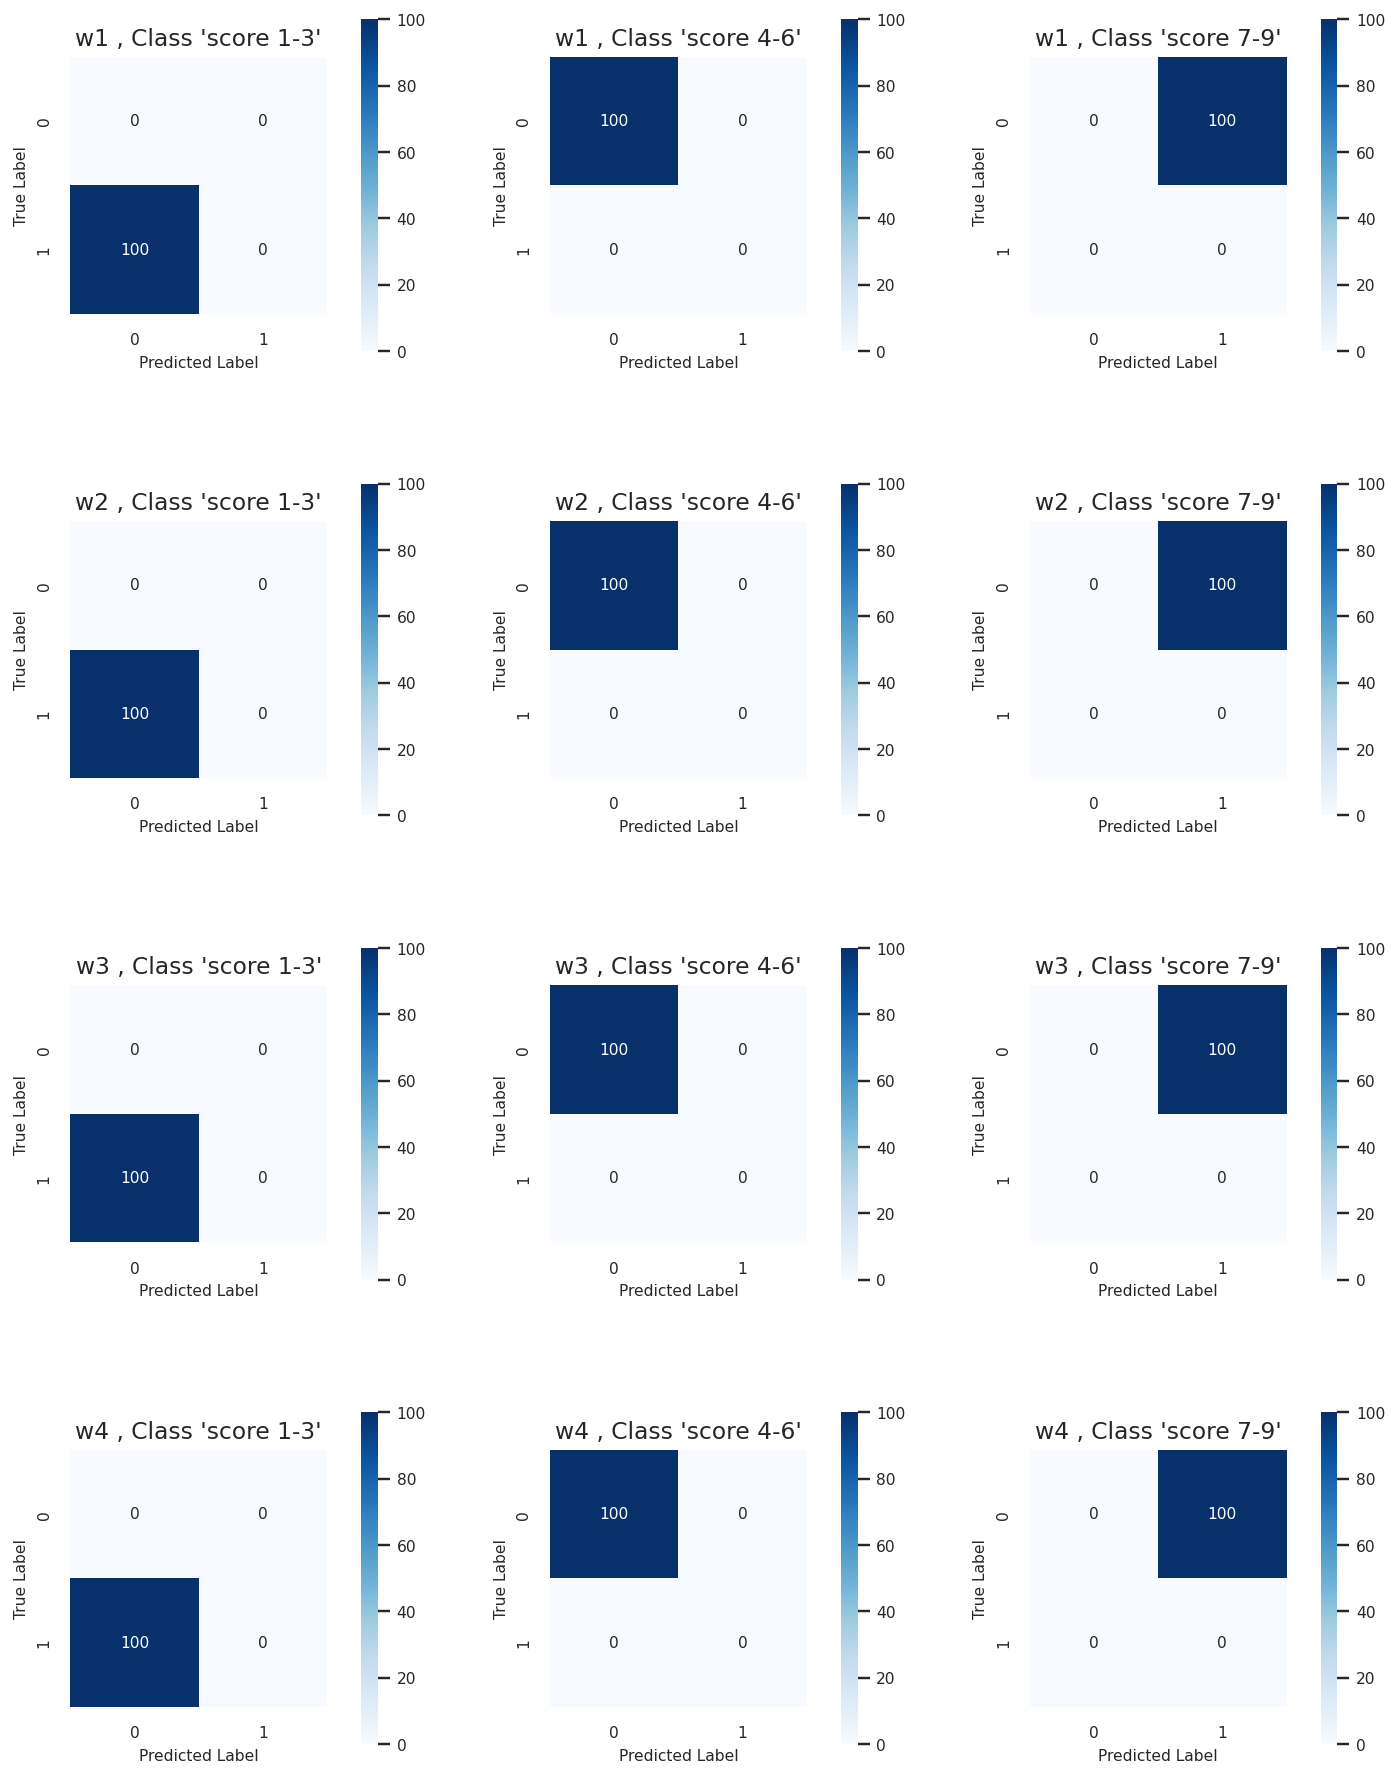

In [14]:
_ , conf_mats = stats_pred.get_confusion_matrices_eeg(plot=True)

In [15]:
stats_pred.get_model_performence_stats(conf_mats)

,Worker,Class,TN,FP,FN,TP,Accuracy,Balanced Accuracy,Precision,Recall,True Negative Rate,Informedness,F1
0,w4,1,0,0,100,0,0.0,0.0,0,0,0.0,-1.0,0
1,w4,2,100,0,0,0,1.0,0.5,0,0,1.0,0.0,0
2,w4,3,0,100,0,0,0.0,0.0,0,0,0.0,-1.0,0
3,w3,1,0,0,100,0,0.0,0.0,0,0,0.0,-1.0,0
4,w3,2,100,0,0,0,1.0,0.5,0,0,1.0,0.0,0
5,w3,3,0,100,0,0,0.0,0.0,0,0,0.0,-1.0,0
6,w1,1,0,0,100,0,0.0,0.0,0,0,0.0,-1.0,0
7,w1,2,100,0,0,0,1.0,0.5,0,0,1.0,0.0,0
8,w1,3,0,100,0,0,0.0,0.0,0,0,0.0,-1.0,0
9,w2,1,0,0,100,0,0.0,0.0,0,0,0.0,-1.0,0
